# Phase 4 Project - 
## Natural Language Processing Model for Twitter Reviews on Android, Apple, and Google

Name: Andrew Levinton
Student Pace: Self Pace
Instructor name: Ahbhineet Kukarni

# Tech Stack
- Python
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn
- Natural Language Toolkit

![twitter.jpg](./images/twitter.jpg)

# Business  Problem

In this study, we will be analyzing tweets from twitter to help present findings on sentiment towards product related to Android, Apple, and Google. Many companies want to keep track of public sentiment about various products. Positive sentiment might drive production for creators or inventory management for retailers. It might drive the attention of influencers, news organizations, and consumers. Twitter is a platform where individuals and companies express themselves and have conversations and is full of information about how people feel about particular products.


## I. Business Understanding
The goals of the business problem will be:

1. Analyze tweets from twitter to gain insight of sentiment towards various products. 
2. Determine which features of tweets best show as the best predict if tweets can be categorized as positive, negative, or neither. 
3. Maximize positive sentiment for products from the following companies. 

### Business Questions to consider:
1. Do customers have positive or negative sentiment towards Apple, Android, or Google products?
2. Which products might retailers want to keep in their stores to maxmize profit in inventory management?
3. Which products might influencers want to highlight in their posts to gain the most attraction?

### The problem with sentiment
Emotions are also relative. Consdier the phrase, "iPhones are better than Android phones." Is this a positive or a negative tweet? It depends! For this reason purposeful data preprocessing will be essential to building data categorization before training it on the model itself. There is a LOT of cleaning that needs to occur, with tweets containing many various symbols and characters that will distract the model from providing an accurate prediction. 




# II. Data Understanding



In [7]:
import pandas as pd
import numpy as np
import random

import os

# machine learning modeling
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

# nlp word processing
import re
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer



import seaborn as sns
import matplotlib.pyplot as plt

# Pipelines
from imblearn.pipeline import Pipeline, make_pipeline

# SMOTE
from imblearn.over_sampling import SMOTE



plt.style.use('ggplot')

#### Encodings
In the EDA, I have created a list of encodings (utf-8, latin-1, utf-16) to try. The code attempts to read the CSV file using each encoding until it succeeds or exhausts all the encodings. Once the successful encoding is found, the loop is exited, and the DataFrame (tweet_df) is displayed. This process is in the EDA version of this notebook. If you run this code vs the one in the EDA, it will produce the same results. 

In [8]:
tweet_df = pd.read_csv('./data/judge-1377884607_tweet_product_company.csv', encoding='latin-1')
tweet_df_appl = pd.read_csv('./data/apple-twitter-sentiment-texts.csv', encoding='utf-8')

tweet_df.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

In [9]:
#rename columns
tweet_df.columns = ['tweet','product','sentiment']
# Display the DataFrame
tweet_df.head()

tweet             product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

In [7]:
tweet_df['sentiment'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

## Checking for missing values

In [153]:
tweet_df.isnull().sum()

tweet           1
product      5802
sentiment       0
dtype: int64

#### Missing Values
It appears that the product column may contains a large amount of missing values. It will be important to explore this column and see if those values can be filled in or need to be dropped.

#### Initial Obersvations

We see that we have three columns available in the dataframe:
1. tweet - The text of the tweet. We see that this column contains the "review" or tweet about product from each customer. 
2. product - This column represents the product or brand from the tweet.
3. sentiment - This column represents the sentiment or emotion toward the brand or product.

The **sentiment** will be our target column. 

## Functions

The functions shown below are developed to aid in data cleaning and preprocessing. The purpose is to simplify the data to enable a more accurate spread of the data distribution as well as avoid repeated code within the notebook. 

The code provided includes several functions and operations on the tweet_df DataFrame. Here's a brief explanation of each function and operation:

1. `Renaming Sentiment Column Values`: This operation uses a lambda function and string comparisons to rename the values in the 'sentiment' column of the tweet_df DataFrame. It converts values like 'negative emotion' to 'negative', 'positive emotion' to 'positive', and so on.

2. `Renaming Product Column Values`: Similar to the sentiment column renaming, this operation uses a lambda function and string comparisons to rename the values in the 'product' column of the tweet_df DataFrame. It converts various forms of 'iPhone', 'iPad', 'Apple', 'Android', 'Google', and other variations to consistent labels like 'Apple', 'Android', 'Google', and 'Product Unknown' for missing values.

3. `Filling Null and Missing Values`: This operation fills the missing values in the 'product' column with the label 'Product Unknown' using fillna(), and then removes any remaining rows with null values using dropna().

4. `Plot Distribution Function`: This function, plot_distribution, takes a DataFrame (df) and a column name (col_name) as input. It generates a histogram plot of the distribution of values in the specified column. It sets the title, x and y labels, and shows the plot using matplotlib.

5. `Filling Unknown Product Values`: This operation fills the unknown 'product' values in the 'tweet' column of the DataFrame using a lambda function and string checks. It assigns labels like 'Apple', 'Google', 'Android', or 'Unknown' based on the presence of specific keywords in the 'tweet' column.


In [9]:
#renaming sentiment column values
tweet_df['sentiment'] = tweet_df['sentiment'].str.lower().apply(lambda x: 'negative' if x=='negative emotion'\
                                                                           else 'positive' if x=='positive emotion'\
                                                                           else 'none' if x=='no emotion toward brand or product'or x=="i can't tell"\
                                                                           else x)
#renaming product values
tweet_df['product'] = tweet_df['product'].str.lower().apply(lambda x: 'Apple' if x=='iphone' or x=='ipad or iphone app' or x=='other apple product or service' or x=='ipad' or x=='apple'\
                                                                           else 'Android' if x=='android app' or x=='android'\
                                                                           else 'Google' if x=='google'or x=="other google product or service"\
                                                                           else x)
#filling nulls of missing values
tweet_df['product'].fillna('Product Unknown', inplace = True)
tweet_df.dropna(inplace = True)

tweet_df_appl['sentiment'] = tweet_df_appl['sentiment'].apply(lambda x: 3 if x=='3' else 5 if x=='5' else 1 if x=='1' else x)


#function for plotting distributions
def plot_distribution(df, col_name):
    sentiment_counts = df[col_name].value_counts()
    df[col_name].hist(figsize=(10,6))
    plt.title(f'{col_name.capitalize()} Distribution')
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.ylabel('count')
    plt.show()
    

#filling unknown product values
tweet_df['product'] = tweet_df['tweet'].str.lower().apply(lambda x: 'Apple' if 'ipad' in x\
                                                          or 'apple' in x or 'iphone' in x\
                                                          or 'itunes' in x or 'mac' in x\
                                                          or 'macbook' in x\
                                                          else 'Google' if 'google' in x\
                                                          else 'Android' if 'android' in x\
                                                          else 'Unknown')

def save_text_file(df, df_name):
    # Get the current working directory
    current_directory = os.getcwd()

    # Concatenate the text data
    text_data = df['tweet_text_cleaned'].str.cat(sep=' ')

    # Define the file name
    file_name = f'{df_name}.txt'

    # Combine the directory path and file name
    output_file_path = os.path.join(current_directory, file_name)

    # Writing the text to the file
    with open(output_file_path, 'w', encoding='utf-8') as file:
        file.write(text_data)

    print(f"Text data saved to '{output_file_path}'.")

    
def plot_cm_senti(model, target_val,target_hat):
    # Obtain the confusion matrix
    confusion_mat = confusion_matrix(target_val,target_hat)

    # Display the confusion matrix
    # Define class labels
    class_labels = ["Positive", "Negative", "None"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix: {model}")
    plt.xlabel("Predicted Labels", fontsize=15)
    plt.ylabel("True Labels", fontsize=15)
    plt.xticks([0.5,1.5, 2.5], class_labels, fontsize=15)
    plt.yticks([0.5,1.5, 2.5], class_labels, fontsize=15)
    plt.show()

    
# def plot_learning_curve_basic(X, y, train_sizes, scoring):
#     model = make_pipeline(
#         TfidfVectorizer(max_df=0.5, ngram_range=(1, 2)),
#         SMOTE(random_state=42),
#         MultinomialNB()  # Default hyperparameters for the basic model
#     )

#     train_sizes_abs, train_scores, test_scores = learning_curve(
#         model, X, y, train_sizes=train_sizes, cv=3, scoring=scoring
#     )

#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

#     plt.figure(figsize=(8, 6))
#     plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     plt.legend(loc="best")
#     plt.grid(True)
#     plt.title("Learning Curve")
#     plt.show()

#     return train_sizes_abs, train_scores_mean, test_scores_mean

In [ ]:
tweet_df = 

### Observing the target column

Here we will look at the distribution of the target column. It will be important to explore the labels to see if any type of under or over sampling may be necessary during the modeling phase of this study.

Observing the distribution of the target column in sentiment prediction for NLP is important because it helps identify class imbalances, understand data quality, and select appropriate evaluation metrics and models. By calculating frequency counts, visualizing the distribution, and computing summary statistics, we can gain insights into class imbalances, anomalies, and the overall characteristics of the data. This information guides us in addressing imbalances, making data-driven decisions, and improving model performance.

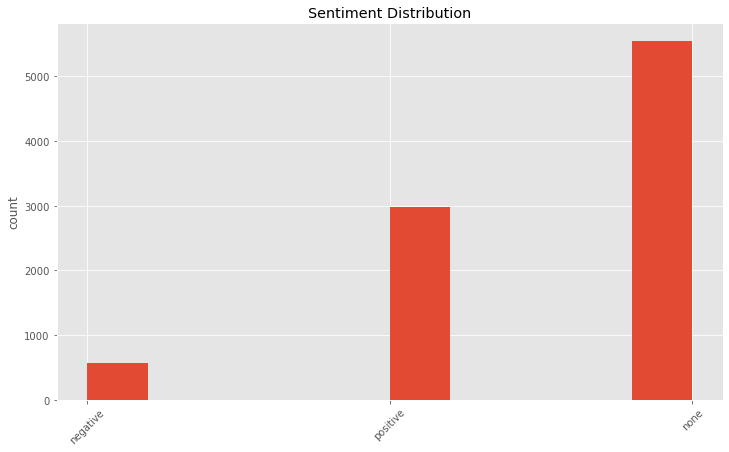

In [11]:
plot_distribution(tweet_df, 'sentiment')

In [155]:
tweet_df['sentiment'].value_counts()

none        5544
positive    2978
negative     570
Name: sentiment, dtype: int64

#### Understanding Class Imbalance
By examining the distribution of the target column, you can determine if there is a class imbalance issue. Class imbalance occurs when one class is significantly more prevalent than the others. This can impact the model's performance, as it may become biased towards the majority class. Identifying class imbalance early on helps in choosing appropriate strategies to handle it.

### SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used in the context of imbalanced classification problems. Imbalanced classification occurs when the distribution of classes in the training data is highly skewed, meaning one class (the minority class) has significantly fewer samples compared to the other class(es) (the majority class).

The main use case and purpose of SMOTE are to address the imbalanced class distribution and improve the performance of machine learning models, especially in scenarios where the minority class is of particular interest and misclassification of the minority class is more critical.

#### Model Selection and Evaluation
The distribution of the target column influences the choice of evaluation metrics and the selection of an appropriate model. Understanding the distribution allows for better evaluation and comparison of different models, as well as assessing their effectiveness in capturing the desired sentiment patterns.

## Observing the product column

In [12]:
tweet_df['product'].value_counts()

Apple      5613
Google     2417
Unknown     717
Android     345
Name: product, dtype: int64

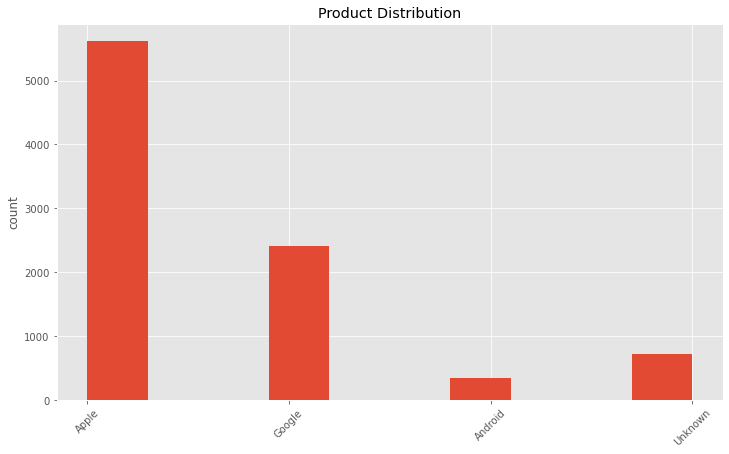

In [13]:
plot_distribution(tweet_df, 'product')

## Product Distribution

- Apple is the most discussed product: With a count of 5613, Apple appears to be the most frequently mentioned product in the dataset. This suggests that Apple products may be more popular or widely used, or they could simply be more often associated with specific sentiments or opinions.

- Google has significant attention: Google comes in second with a count of 2417 mentions. This indicates that Google products or services are also a major topic of discussion in the dataset, though they are not as dominant as Apple. The analysis might delve into understanding the sentiment patterns around Google products.

- Unknown category requires investigation: The category labeled as "Unknown" with 717 mentions is a concern since the sentiment analysis results may not be conclusive without knowing the actual products mentioned. It could be due to insufficient data or misclassification during data preprocessing. Further investigation is needed to identify and categorize these products to ensure a comprehensive analysis.

- Android has a relatively lower count: With only 345 mentions, Android appears to have a smaller presence in the sentiment analysis. This could suggest that Android-related discussions are less frequent or less emotionally charged in comparison to Apple and Google products.

## Sentiment breakdown by target
Analyzing the sentiment breakdown by product is crucial for assessing product performance, identifying issues, and designing targeted improvement strategies. By evaluating the sentiment distribution for each product, organizations can understand customer satisfaction levels, pinpoint areas of improvement, and allocate resources effectively. This breakdown aids decision-making, allows for benchmarking against competitors, and helps in prioritizing efforts for product development, marketing, and customer support. By leveraging sentiment breakdown data, businesses can enhance customer satisfaction, address challenges, and achieve overall success.

In [14]:
# sentiment breakdown by target
grouped = tweet_df.groupby(['product', 'sentiment']).count().reset_index()
grouped

product sentiment  tweet
0   Android  negative     15
1   Android      none    194
2   Android  positive    136
3     Apple  negative    425
4     Apple      none   3040
5     Apple  positive   2148
6    Google  negative    129
7    Google      none   1620
8    Google  positive    668
9   Unknown  negative      1
10  Unknown      none    690
11  Unknown  positive     26

In [16]:
grouped_android = grouped[grouped['product'] == 'Android'][['sentiment','tweet']]
grouped_Apple = grouped[grouped['product'] == 'Apple'][['sentiment','tweet']]
grouped_Google = grouped[grouped['product'] == 'Google'][['sentiment','tweet']]
grouped_Unknown = grouped[grouped['product'] == 'Unknown'][['sentiment','tweet']]

In [18]:
print("Grouped Android: Sentiment Distribution ")
print(grouped_android);
print('\n')
print("Grouped Apple: Sentiment Distribution ")
print(grouped_Apple);
print('\n')
print("Grouped Google: Sentiment Distribution ")
print(grouped_Google);
print('\n')
print("Grouped Unknown: Sentiment Distribution ")
print(grouped_Unknown);

Grouped Android: Sentiment Distribution 
  sentiment  tweet
0  negative     15
1      none    194
2  positive    136


Grouped Apple: Sentiment Distribution 
  sentiment  tweet
3  negative    425
4      none   3040
5  positive   2148


Grouped Google: Sentiment Distribution 
  sentiment  tweet
6  negative    129
7      none   1620
8  positive    668


Grouped Unknown: Sentiment Distribution 
   sentiment  tweet
9   negative      1
10      none    690
11  positive     26


### Visual of Distribution of Sentiment Breakdown by Product

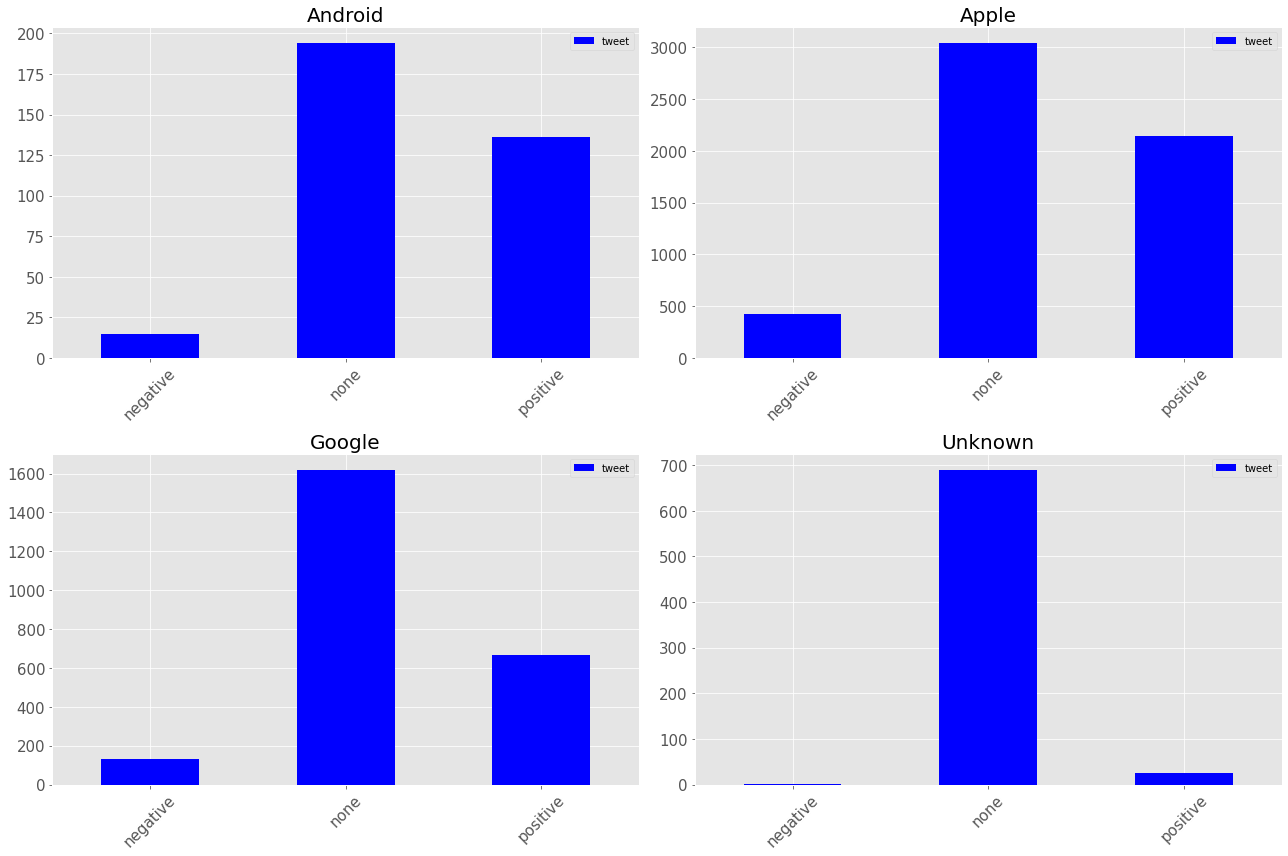

In [17]:
products = [grouped_android, grouped_Apple, grouped_Google, grouped_Unknown]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

axes = axes.flatten()

category_names = ['Android', 'Apple', 'Google', 'Unknown']

xticks = ['negative', 'none', 'positive'] 

for i, category in enumerate(products):
    ax = axes[i]
    category.plot(kind='bar', ax=ax, color='b')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(category_names[i], fontsize=20)
    ax.tick_params(axis='x', rotation=45, labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xticklabels(xticks)  

plt.tight_layout()
plt.show()


# Data Preparation

## I. Text Cleaning - Word Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning.   

The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).


#### Text Before Cleaning:
- "~RT~ ~@LaurieShook:~ I~'~m look~ing~ forward ~to the~ ~#~SMCDallas pre ~#SXSW~ party Wed~.,~ ~and~ hop~ing~ I~'~ll win ~an~ ~#iPad~ result~ing~ ~from~ ~my~ shameless promotion~.~  ~#~ChevySMC"

#### Text After Cleaning:
- 'im look forward smcdallas pre party wed hop ill win result shameless promotion chevysmc'

In [20]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

sw = stopwords.words('english')
'''Initializes the sw variable with a list of stopwords from the NLTK library. 
Stopwords are commonly used words (such as articles, prepositions, etc.) 
that often don't carry much meaning in a text and can be safely ignored during analysis.'''

sw.extend(['link', 'rt', 'sxsw', 'get', 'google', 'apple', 'iphone', 'ipad'])
'''Additional words ('link', 'rt', 'sxsw', 'get', 'google', 'apple', 'iphone', 'ipad') 
are appended to the list of stopwords. These words are typically specific to the context 
or domain and are considered irrelevant for analysis.'''

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!#'
'''Defines a string containing various 
punctuation marks and special characters that need 
to be removed from the text.'''

no_accents_re = re.compile('^[a-z]+$')
'''This line compiles a regular expression pattern that matches 
words consisting only of lowercase letters without any accents.'''

accents = ['á', 'â', 'ã', 'à', 'å', 'ª', 'ç', 'è', '¼', '¾', 'î', 'ï', 'ì', 'ó', 'ö', 'ð', 'ü', 'ù', 'û', 'ý']
'''This list contains various accent characters that need to be removed from the words.'''

twitter_re = re.compile('[@][a-zA-Z]*')
'''Compile a regular expression pattern that matches strings consisting only of digits.'''

num_re = re.compile('^\d+$')
'''The text string (txt) is split into a list of words based on whitespace.'''

def remove_punctuation(text, punctuation):
    for char in punctuation:
        text = text.replace(char, '')
    return text

def remove_twitter_handles(text, twitter_re):
    words = text.split()
    filtered_words = []
    for word in words:
        if not twitter_re.match(word):
            filtered_words.append(word)
    return ' '.join(filtered_words)

def remove_numbers(text, num_re):
    words = text.split()
    filtered_words = []
    for word in words:
        if not num_re.match(word):
            filtered_words.append(word)
    return ' '.join(filtered_words)

def remove_accents(text, accents, no_accents_re):
    words = text.split()
    filtered_words = []
    for word in words:
        if no_accents_re.match(word):
            filtered_words.append(word)
    return ' '.join(filtered_words)

def txt_clean(txt, stop_words=sw):
    t = txt.lower()
    t = remove_punctuation(t, punctuation)
    t = remove_twitter_handles(t, twitter_re)
    t = remove_numbers(t, num_re)
    t = remove_accents(t, accents, no_accents_re)
    t = t.split()
    t = [w for w in t if w not in stop_words and w]
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    return ' '.join(t)

tweet_df['tweet_text_cleaned'] = tweet_df['tweet'].map(txt_clean)


In [21]:
pd.set_option('display.max_colwidth', None)

In [36]:
tweet_df['tweet'][25]

"RT @LaurieShook: I'm looking forward to the #SMCDallas pre #SXSW party Wed., and hoping I'll win an #iPad resulting from my shameless promotion.  #ChevySMC"

In [37]:
tweet_df['tweet_text_cleaned'][25]

'im look forward smcdallas pre party wed hop ill win result shameless promotion chevysmc'

## II. Data Preprocessing - Train Test Split
The train-test split is a process used in machine learning to evaluate model performance. It involves dividing a dataset into two parts: a training set and a testing set. The training set is used to train the model, while the testing set is used to assess its performance on unseen data. The process includes randomizing the dataset, selecting a split ratio, dividing the data into the two subsets, training the model on the training set, and evaluating its performance on the testing set. This approach helps estimate how well the model will generalize to new, unseen data and allows for model optimization before real-world deployment.

Train-test split is typically performed at the beginning of the machine learning process to avoid data leakage. Data leakage refers to a situation where information from the testing set inadvertently influences the training process or model evaluation, leading to overly optimistic performance estimates. It can result in models that generalize poorly to new, unseen data.

Machine Learning models require numeric values, so we will replace them. `Positive` will receive the numeric label `0`, `Negative` will receive the numeric label `1`, and `none` will receive the numeric label `2`.

In [23]:
tweet_df['sentiment'] = tweet_df['sentiment'].apply(lambda x: 0 if x=='positive'\
                                                    else 1 if x=='negative'\
                                                    else 2 if x=='none'\
                                                   else x)

In [24]:
tweet_df['sentiment'].value_counts()

2    5544
0    2978
1     570
Name: sentiment, dtype: int64

#### Split data into x and y

In [25]:
X = tweet_df['tweet_text_cleaned']
y = tweet_df['sentiment']

# train test split for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)
# train test split for validation set
X_t, X_val, y_t, y_val = train_test_split(X, y, random_state = 42, test_size = 0.25)

## Tokenization
Tokenization is a fundamental step in Natural Language Processing (NLP) that involves breaking down text into smaller units called tokens. These tokens can be words, sentences, or even subword units, depending on the level of granularity required for a specific NLP task.

## Count Vectorizer
A **CountVectorizer** is a popular text preprocessing technique in natural language processing (NLP). It is used to convert a collection of text documents into a matrix of token (word) counts. In other words, it transforms a set of textual data into a numerical format that machine learning models can understand and process.

**Vector Representation**: The count vectorizer represents each document as a numeric vector where the value in each position corresponds to the count of the word at that index in the vocabulary. The vector is typically sparse because most documents contain only a subset of the entire vocabulary.


## Plotting Unigrams

### What is a unigram?
In natural language processing, an n-gram is a sequence of n words. For example, “statistics” is a unigram (n = 1), “machine learning” is a bigram (n = 2), “natural language processing” is a trigram (n = 3). For longer n-grams, people just use their lengths to identify them, such as 4-gram, 5-gram, and so on. In this part of the project, we will focus only on language models based on unigrams i.e. single words.

In [26]:
#initialize count vectorizer for unigrams
vectorizer = CountVectorizer(ngram_range = (1,1))
#fit_transform the vectorizer to the data
X_count = vectorizer.fit_transform(X)

X_count = pd.DataFrame.sparse.from_spmatrix(X_count)
X_count.columns = sorted(vectorizer.vocabulary_)
X_count.set_index(y.index, inplace=True)

all_uni_labels = X_count.sum().sort_values(ascending = False)[0:10]
uni_positive = X_count[tweet_df['sentiment'] == 0].sum().sort_values(ascending = False)[:10] #positive = 0
uni_negative = X_count[tweet_df['sentiment'] == 1].sum().sort_values(ascending = False)[:10] #negative = 1
uni_no_label = X_count[tweet_df['sentiment'] == 2].sum().sort_values(ascending = False)[:10] #none=2

sentiments_uni = [all_uni_labels, uni_no_label, uni_positive, uni_negative]

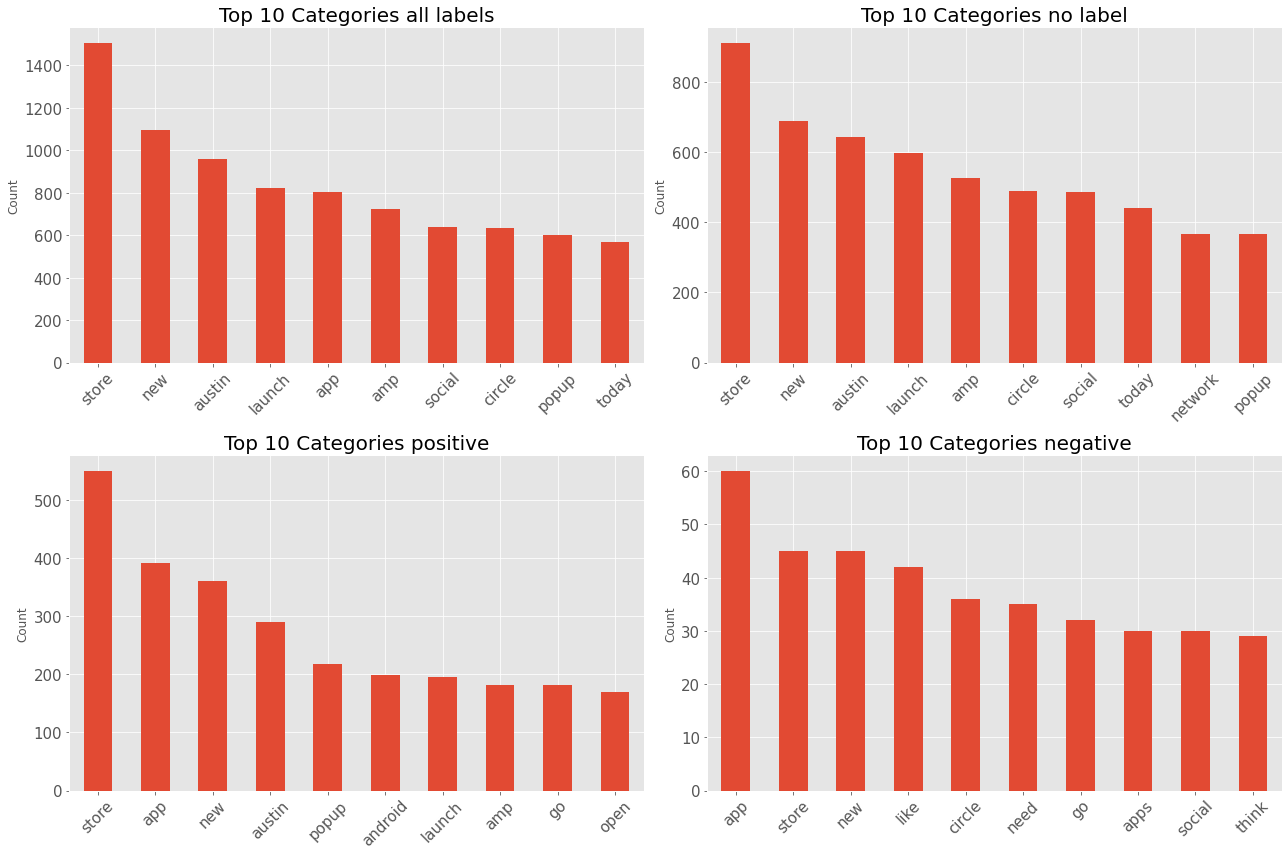

In [27]:
sentiments_uni = [all_uni_labels, uni_no_label, uni_positive, uni_negative]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

axes = axes.flatten()

category_names = ['all labels', 'no label', 'positive', 'negative']


for i, category in enumerate(sentiments_uni):
    ax = axes[i] 
    category.plot(kind='bar', ax=ax)
    ax.set_ylabel('Count')
    ax.set_title(f'Top 10 Categories {category_names[i]}', fontsize=20)
    ax.tick_params(axis='x', rotation=45, labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout() 
plt.show()

## Plotting Bigrams
**What is a bigram?**

A bigram is an n-gram where "n" is equal to 2, meaning it consists of two consecutive words in a given text. When processing a sentence or a document, bigrams capture adjacent word pairs, allowing for a more fine-grained analysis of language patterns and relationships between words.

In [38]:
cv = CountVectorizer(ngram_range = (2,2))
X_count = cv.fit_transform(X)
X_count  = pd.DataFrame.sparse.from_spmatrix(X_count)
X_count.columns = sorted(cv.vocabulary_)
X_count.set_index(y.index, inplace=True)

all_bi_labels = X_count.sum().sort_values(ascending = False)[0:10]
bi_positive = X_count[tweet_df['sentiment'] == 0].sum().sort_values(ascending = False)[0:10] #positive = 0
bi_negative = X_count[tweet_df['sentiment'] == 1].sum().sort_values(ascending = False)[0:10] #negative = 1
bi_no_label = X_count[tweet_df['sentiment'] == 2].sum().sort_values(ascending = False)[0:10] #none=2

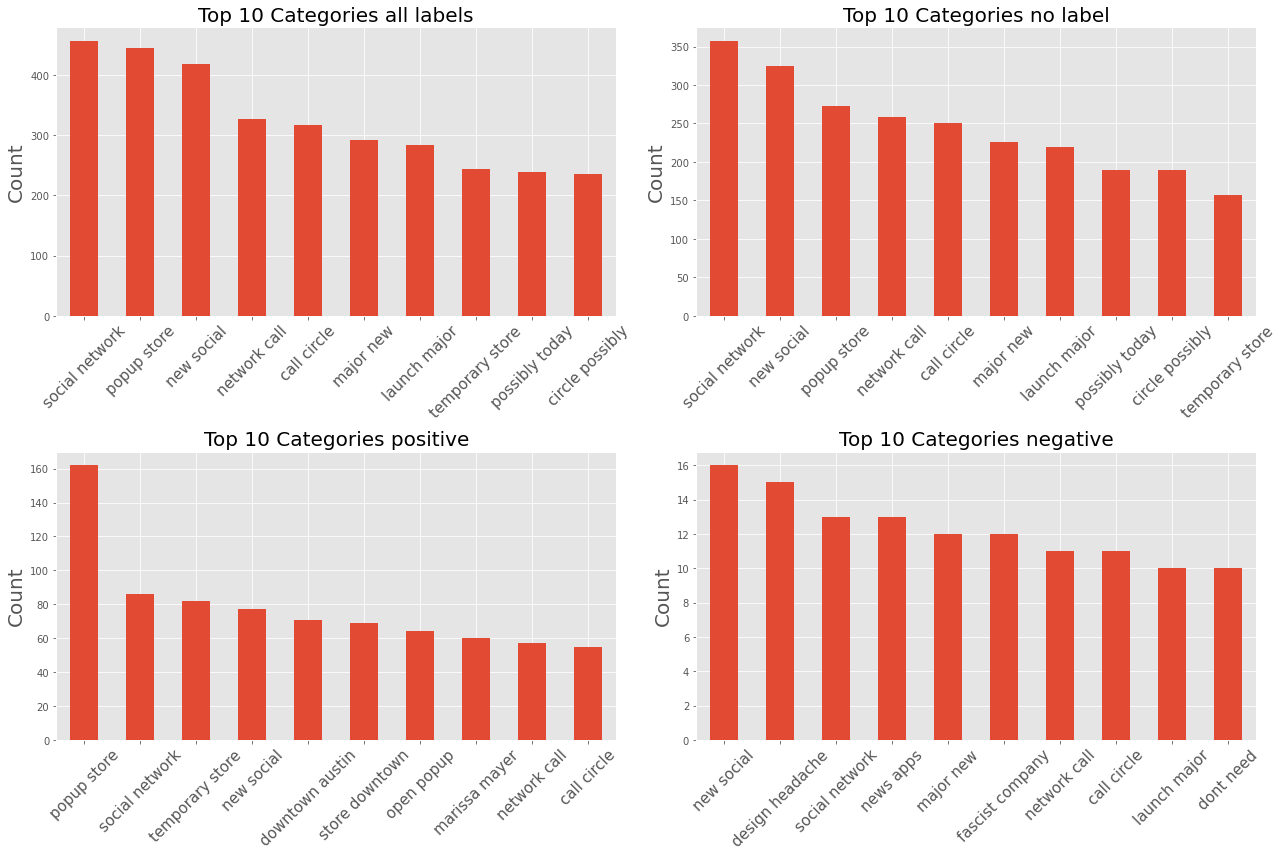

In [39]:
sentiments_bi = [all_bi_labels, bi_no_label, bi_positive, bi_negative]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

axes = axes.flatten()

category_names = ['all labels', 'no label', 'positive', 'negative']


for i, category in enumerate(sentiments_bi):
    ax = axes[i] 
    category.plot(kind='bar', ax=ax) 
    ax.set_ylabel('Count', fontsize=20)
    ax.set_title(f'Top 10 Categories {category_names[i]}', fontsize=20)
    ax.tick_params(axis='x', rotation=45, labelsize=15)

plt.tight_layout() 
plt.show()

**What is a trigram?**

You probably get the idea by now. 

In [40]:
cv = CountVectorizer(ngram_range = (3,3))
X_count = cv.fit_transform(X)
X_count  = pd.DataFrame.sparse.from_spmatrix(X_count)
X_count.columns = sorted(cv.vocabulary_)
X_count.set_index(y.index, inplace=True)

all_tri_labels = X_count.sum().sort_values(ascending = False)[0:10]
tri_positive = X_count[tweet_df['sentiment'] == 0].sum().sort_values(ascending = False)[0:10] #positive = 0
tri_negative = X_count[tweet_df['sentiment'] == 1].sum().sort_values(ascending = False)[0:10] #negative = 1
tri_no_label = X_count[tweet_df['sentiment'] == 2].sum().sort_values(ascending = False)[0:10] #none=2

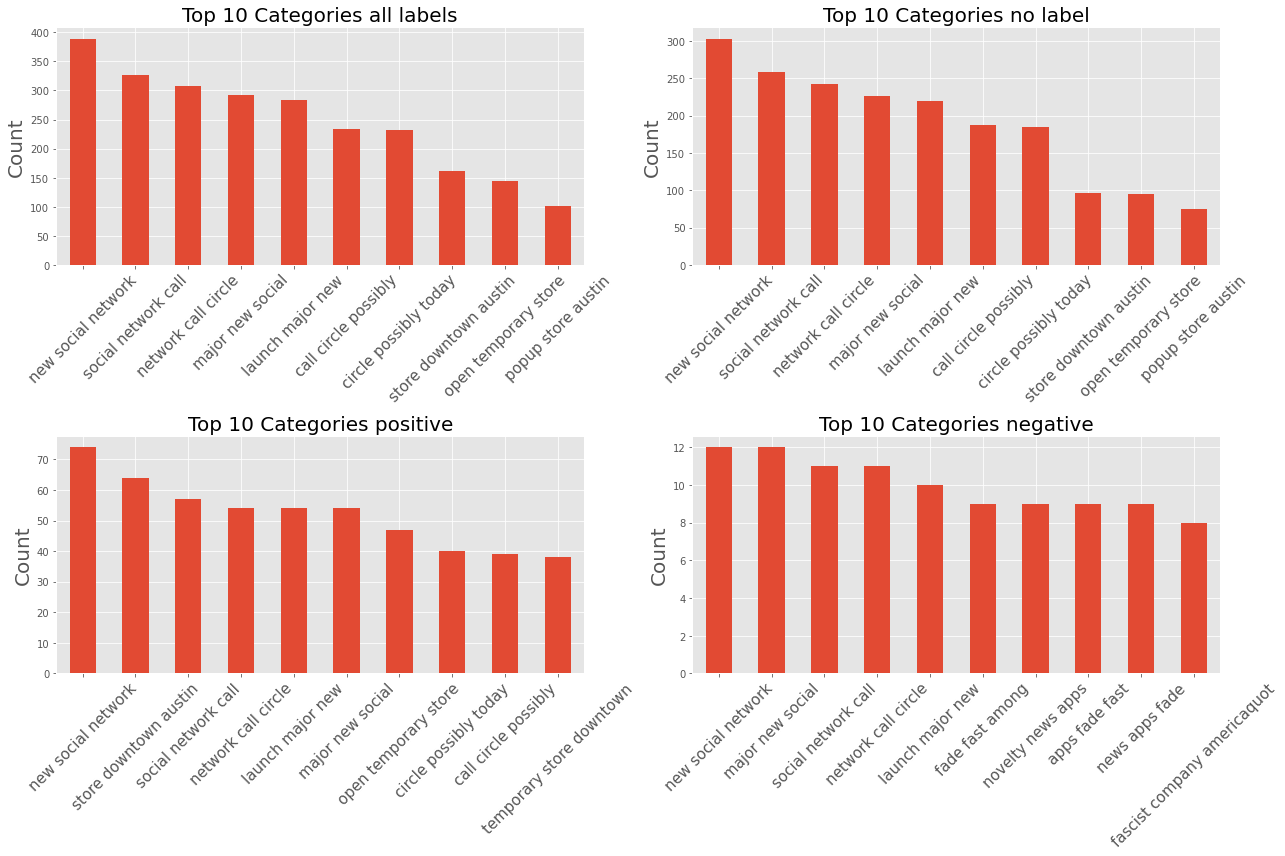

In [41]:
sentiments_bi = [all_tri_labels, tri_no_label, tri_positive, tri_negative]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

axes = axes.flatten()

category_names = ['all labels', 'no label', 'positive', 'negative']


for i, category in enumerate(sentiments_bi):
    ax = axes[i] 
    category.plot(kind='bar', ax=ax) 
    ax.set_ylabel('Count', fontsize=20)
    ax.set_title(f'Top 10 Categories {category_names[i]}', fontsize=20)
    ax.tick_params(axis='x', rotation=45, labelsize=15)

plt.tight_layout() 
plt.show()

## Count Vectorizer - Unigrams

In [42]:
cv = CountVectorizer(ngram_range = (1,1))
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

X_t_vec.sum(axis = 0).sort_values(ascending = False)[:16]

store      1149
new         809
austin      709
launch      634
app         601
amp         558
social      493
circle      483
popup       475
today       436
android     430
open        377
network     367
go          355
line        344
via         334
dtype: int64

## Count Vectorizer - Bigrams

In [43]:
cv = CountVectorizer(ngram_range = (2,2))
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

X_t_vec.sum(axis = 0).sort_values(ascending = False)[:16]

social network     353
popup store        353
new social         320
network call       253
call circle        247
major new          222
launch major       218
temporary store    185
possibly today     182
circle possibly    180
store austin       154
open popup         141
downtown austin    139
store downtown     127
marissa mayer      126
open temporary     106
dtype: int64

## Count Vectorizer - Trigrams

In [44]:
cv = CountVectorizer(ngram_range = (3,3))
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

X_t_vec.sum(axis = 0).sort_values(ascending = False)[:16]

new social network          302
social network call         253
network call circle         239
major new social            222
launch major new            218
call circle possibly        178
circle possibly today       176
store downtown austin       118
open temporary store        105
open popup store             74
temporary store downtown     72
popup store austin           72
open popup shop              65
launch new social            55
downtown austin launch       54
ubersocial app store         48
dtype: int64

## TFIDF Vectorizer

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a widely used text preprocessing technique in natural language processing (NLP). It is used to convert a collection of text documents into numerical vectors while taking into account the importance of words in each document and their significance in the entire corpus. TF-IDF is commonly used for information retrieval, text mining, and text classification tasks.

**Term Frequency (TF) Calculation**: For each document in the text collection, the term frequency is computed for each word. The term frequency of a word in a document is the number of times that word appears in that document. It is calculated as follows:
TF(word, document) = (Number of occurrences of 'word' in 'document') / (Total number of words in 'document')

**Inverse Document Frequency (IDF) Calculation**: IDF measures the importance of a word in the entire corpus by penalizing words that occur frequently across all documents. IDF is calculated for each word as follows:
IDF(word) = log((Total number of documents) / (Number of documents containing 'word')) + 1

The "+ 1" is added to prevent division by zero in case a word appears in all documents.

**TF-IDF Calculation**: Finally, the TF-IDF score for each word in each document is computed by multiplying the TF value with the IDF value for that word:
TF-IDF(word, document) = TF(word, document) * IDF(word)

**Vector Representation**: The TF-IDF vectorizer represents each document as a numeric vector where each position corresponds to a word in the vocabulary. The value in each position is the TF-IDF score of the corresponding word in that document. The resulting vectors are typically sparse since most documents contain only a subset of the entire vocabulary.

In [45]:
tfidf = TfidfVectorizer(ngram_range = (1,1))
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace = True)

X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

X_t_vec.sum(axis = 0).sort_values(ascending = False)[:16]

store      234.545678
new        162.288796
austin     156.198635
launch     155.104205
circle     129.454676
popup      126.204300
social     124.331043
app        122.004207
open       111.630391
today      109.321904
network    105.781744
amp        104.075700
android     93.538809
line        91.326327
call        89.775540
via         89.719727
dtype: float64

In [46]:
tfidf = TfidfVectorizer(ngram_range = (2,2))
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace = True)

X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

X_t_vec.mean(axis = 0).sort_values(ascending = False)[:16]

social network     0.012930
new social         0.012085
popup store        0.011731
network call       0.010476
call circle        0.010262
major new          0.009460
launch major       0.009367
possibly today     0.008206
circle possibly    0.008175
temporary store    0.007936
store austin       0.006563
open popup         0.006396
downtown austin    0.006220
store downtown     0.005855
open temporary     0.005493
popup shop         0.004522
dtype: float64

In [47]:
tfidf = TfidfVectorizer(ngram_range = (3,3))
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace = True)

X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

X_t_vec.sum(axis = 0).sort_values(ascending = False)[:16]

new social network          82.090537
social network call         73.657388
network call circle         71.017380
major new social            66.538259
launch major new            65.953880
call circle possibly        56.973097
circle possibly today       56.740854
open temporary store        38.480669
store downtown austin       38.315608
temporary store downtown    27.571082
popup store austin          25.607967
open popup store            25.562565
open popup shop             24.211589
downtown austin launch      24.078121
launch new social           20.196589
rumor open temporary        18.895179
dtype: float64

# Word Cloud Data Prep

In this section of the notebook, text is prepped and stored in the directory to be sent to another notebook in the repository to create a visual for the presentation. This part of the notebook does not serve in the actual exploratory data analysis, data preparation, or modeling of the NLP process.

In [48]:
tweet_df['tweet_text_cleaned']

0                                                            hr tweet riseaustin dead need upgrade plugin station
1                              know awesome ipadiphone app youll likely appreciate design also theyre give free t
2                                                                                                  wait also sale
3                                                                         hope year festival isnt crashy year app
4                    great stuff fri marissa mayer tim oreilly tech booksconferences amp matt mullenweg wordpress
                                                          ...                                                    
9088                                                                                                   everywhere
9089                                          wave buzz interrupt regularly schedule geek program big news circle
9090    google zeiger physician never report potential ae yet fda relies physician quotw

### Writing all cleaned text as one string

In [49]:
tweet_df['tweet_text_cleaned'].str.cat(sep = ' ')

'hr tweet riseaustin dead need upgrade plugin station know awesome ipadiphone app youll likely appreciate design also theyre give free t wait also sale hope year festival isnt crashy year app great stuff fri marissa mayer tim oreilly tech booksconferences amp matt mullenweg wordpress new apps speechtherapy communication showcased conference iear edchat asd start ctia around corner googleio hop skip jump good time android fan beautifully smart simple idea write hollergram app httpbitlyieavob counting day plus strong canadian dollar mean stock gear excited meet show sprint galaxy still run android fail find amp start impromptu party httpbitlygvlrin cant wait til android app come foursquare ups game time still prefer far best look android app date gotta love calendar feature top party show case check via gthttpbitlyaxzwxb great app haha awesomely rad app httpbitlyhtdfim hollergram holler gram itunes app store via noticed dst come weekend many user hour late come sunday morning added fligh

In [50]:
tweet_df_pos = tweet_df[tweet_df['sentiment'] == 0]
tweet_df_neg = tweet_df[tweet_df['sentiment'] == 1]
tweet_df_neu = tweet_df[tweet_df['sentiment'] == 2]

### Saving as txt file

In [51]:
save_text_file(tweet_df, 'all')

Text data saved to 'C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_4\Phase_4_Project_NLP\all.txt'.


In [52]:
save_text_file(tweet_df_pos, 'positive')

Text data saved to 'C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_4\Phase_4_Project_NLP\positive.txt'.


In [53]:
save_text_file(tweet_df_neg, 'negative')

Text data saved to 'C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_4\Phase_4_Project_NLP\negative.txt'.


In [54]:
save_text_file(tweet_df_neu, 'neutral')

Text data saved to 'C:\Users\alevi\Documents\Flatiron\dsc-data-science-env-config\Course_Folder\Phase_4\Phase_4_Project_NLP\neutral.txt'.


# IV. Modeling 

## Baseline: Shallow Multinomial Naive Bayes

A Multinomial Naive Bayes model is a probabilistic classification algorithm commonly used in natural language processing (NLP) tasks. It is an extension of the Naive Bayes algorithm, which assumes that features (words in NLP) are conditionally independent given the class label.

Explanation of Multinomial Naive Bayes:

- `Probability Model`:
In Multinomial Naive Bayes, we model the probability of observing a document (sequence of words) given a class label. The document is represented as a bag-of-words, which means the order of words is disregarded, and only the frequency of each word matters.

- `Feature Representation`:
In NLP tasks, we often use a bag-of-words representation, where each document is represented as a vector of word counts. The elements of this vector are the frequencies of each word in the document.

- `Conditional Independence`:
The "naive" assumption in Naive Bayes is that the features (word counts) are conditionally independent given the class label. In NLP, this implies that the occurrence of one word does not affect the occurrence of other words in the same document, given the class label.

- `Parameter Estimation`:
To build a Multinomial Naive Bayes model, we estimate the probabilities of observing each word in the vocabulary given a specific class. These probabilities are learned from the training data, and they represent the likelihood of seeing each word in documents of a particular class.

Justification for using Multinomial Naive Bayes in NLP:

- `Efficiency and Scalability`:
Multinomial Naive Bayes is computationally efficient and scales well to large datasets and high-dimensional feature spaces. In NLP, where the vocabulary can be extensive, this efficiency is beneficial.

- `Good Performance with Sparse Data`:
NLP data often results in a sparse feature representation because most documents contain only a small fraction of the entire vocabulary. Multinomial Naive Bayes handles sparse data effectively and can still make reasonably accurate predictions.

- `Text Classification`:
In many NLP tasks, like sentiment analysis, spam detection, and document categorization, Multinomial Naive Bayes has been shown to perform well and achieve competitive results.

- `Handling Multiple Classes`:
Multinomial Naive Bayes can handle more than two classes (multiclass classification) with minimal additional computational cost. This makes it suitable for tasks involving multiple categories or labels.

- `Reasonable Assumption for NLP`:
The independence assumption, though simplistic, often works surprisingly well in NLP tasks. While words in natural language are not entirely independent, the conditional independence assumption captures some level of correlation between words and allows for a straightforward and interpretable model.

In [56]:
mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.6396832380114387

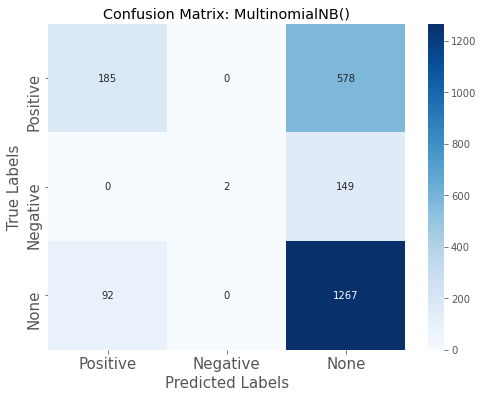

In [57]:
plot_cm_senti(mnb, y_val, y_hat)

## Iteration 2: Grid Search with Pipeline - TFIDF Vectorizer, Smote, MB

In [59]:
pipeline_nb_tf = make_pipeline(TfidfVectorizer(), SMOTE(random_state=42), MultinomialNB())
pipeline_nb_tf

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('multinomialnb', MultinomialNB())])

In [60]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
# Define the parameter grid
grid_nb_tf = {
    'tfidfvectorizer__min_df': [1, 2],
    'tfidfvectorizer__max_df': [0.01, 0.05, 0.25],
    'tfidfvectorizer__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3)],
    'tfidfvectorizer__norm': ('l1', 'l2'),
    'multinomialnb__alpha': [1, 0.1, 0.01, 0.001]   
}

In [61]:
gs_nb_tf = GridSearchCV(pipeline_nb_tf, grid_nb_tf, cv=3)

In [62]:
gs_nb_tf.fit(X_t, y_t)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'multinomialnb__alpha': [1, 0.1, 0.01, 0.001],
                         'tfidfvectorizer__max_df': [0.01, 0.05, 0.25],
                         'tfidfvectorizer__min_df': [1, 2],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2), (2, 3),
                                                          (3, 3)],
                         'tfidfvectorizer__norm': ('l1', 'l2')})

In [63]:
gs_nb_tf.best_params_

{'multinomialnb__alpha': 0.01,
 'tfidfvectorizer__max_df': 0.25,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 2),
 'tfidfvectorizer__norm': 'l1'}

In [64]:
gs_nb_tf.best_estimator_

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.25, ngram_range=(1, 2), norm='l1')),
                ('smote', SMOTE(random_state=42)),
                ('multinomialnb', MultinomialNB(alpha=0.01))])

In [65]:
gs_nb_tf.fit(X_val, y_val)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'multinomialnb__alpha': [1, 0.1, 0.01, 0.001],
                         'tfidfvectorizer__max_df': [0.01, 0.05, 0.25],
                         'tfidfvectorizer__min_df': [1, 2],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2), (2, 3),
                                                          (3, 3)],
                         'tfidfvectorizer__norm': ('l1', 'l2')})

In [66]:
y_pred_nb_tf_train = gs_nb_tf.predict(X_val)
accuracy_score(y_val, y_pred_nb_tf_train)

0.9731632204135504

In [67]:
y_pred_nb_tf = gs_nb_tf.predict(X_val)
accuracy_score(y_val, y_pred_nb_tf)

0.9731632204135504

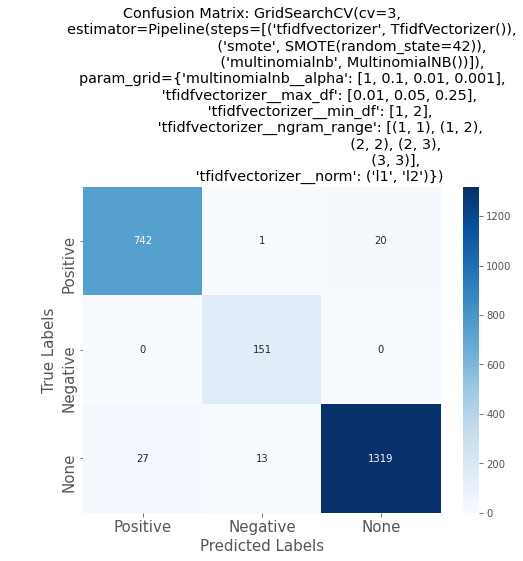

In [68]:
plot_cm_senti(gs_nb_tf, y_val, y_pred_nb_tf)

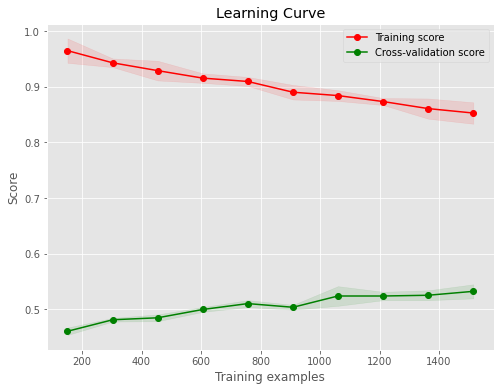

(array([ 151,  303,  454,  606,  757,  909, 1060, 1212, 1363, 1515]),
 array([0.96467991, 0.94279428, 0.9287812 , 0.91529153, 0.90929106,
        0.889989  , 0.88396226, 0.87321232, 0.86060161, 0.85258526]),
 array([0.46062374, 0.48130204, 0.48482414, 0.49977983, 0.51033567,
        0.50373936, 0.52396629, 0.52397384, 0.52529833, 0.53233962]))

In [80]:
# Assuming you have split your data into X_train and y_train, and you have your estimator 'model' ready
# Specify the training sizes you want to observe on the curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Call the function
plot_learning_curve(pipeline_nb_tf, X_val, y_val, train_sizes, cv=3, scoring='accuracy')


## Analysis:
The learning curve suggests the following:

- **Overfitting**: When there are only a few training examples (around 454), the model performs very well on the training data (training score of approximately 0.93). However, it does not generalize well to unseen data (cross-validation score of around 0.52). This indicates overfitting, where the model has memorized the training examples but fails to generalize to new data.

- **Improvement with More Data**: As the number of training examples increases, the performance of the model on both the training and cross-validation sets improves. The training score decreases, suggesting that the model is learning more general patterns from additional data. Simultaneously, the cross-validation score increases, indicating better generalization to unseen data.

- **Convergence**: The learning curve suggests that with around 4,546 training examples, the training and cross-validation scores seem to converge at a score of approximately 0.80 for the training set and 0.59 for the cross-validation set. This convergence indicates that the model is achieving its best performance with the given data.

## Next Steps:

- **Collect more data**: Gathering more data might further improve the model's performance and help reduce the gap between the training and cross-validation scores.

- **Model Complexity**: If the model is too complex, reducing its complexity (e.g., by adjusting hyperparameters or using a simpler model) might improve generalization and reduce overfitting.

- **Model Evaluation**: To get a better idea of how well the model performs on unseen data, evaluate its performance on a separate test set that has not been used for training or cross-validation.

- **Fine-tuning**: If the model's performance is still not satisfactory, you can try fine-tuning hyperparameters or exploring different model architectures to achieve better results.

## Reduction of Complexity 

In [67]:
from imblearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Reduced complexity model pipeline
pipeline_nb_tf_reduced = make_pipeline(
    TfidfVectorizer(max_df=0.5, ngram_range=(1, 2)),
    SMOTE(random_state=42),
    MultinomialNB(alpha=0.1) 
)


grid_nb_tf_reduced = {
    'tfidfvectorizer__min_df': [1, 2],
    'tfidfvectorizer__norm': ('l1', 'l2'),
    'multinomialnb__alpha': [0.1, 0.01, 0.001]  # Adjusted alpha values
}

# Create GridSearchCV instance for the reduced complexity model
gs_nb_tf_reduced = GridSearchCV(pipeline_nb_tf_reduced, grid_nb_tf_reduced, cv=3)


In [68]:
gs_nb_tf.fit(X_t, y_t)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'multinomialnb__alpha': [1, 0.1, 0.01, 0.001],
                         'tfidfvectorizer__max_df': [0.01, 0.05, 0.25],
                         'tfidfvectorizer__min_df': [1, 2],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2), (2, 3),
                                                          (3, 3)],
                         'tfidfvectorizer__norm': ('l1', 'l2')})

In [69]:
gs_nb_tf.fit(X_val, y_val)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'multinomialnb__alpha': [1, 0.1, 0.01, 0.001],
                         'tfidfvectorizer__max_df': [0.01, 0.05, 0.25],
                         'tfidfvectorizer__min_df': [1, 2],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2), (2, 3),
                                                          (3, 3)],
                         'tfidfvectorizer__norm': ('l1', 'l2')})

In [70]:
y_pred_nb_tf_train = gs_nb_tf.predict(X_val)
accuracy_score(y_val, y_pred_nb_tf_train)

0.9731632204135504

In [71]:
y_pred_nb_tf = gs_nb_tf.predict(X_val)
accuracy_score(y_val, y_pred_nb_tf)

0.9731632204135504

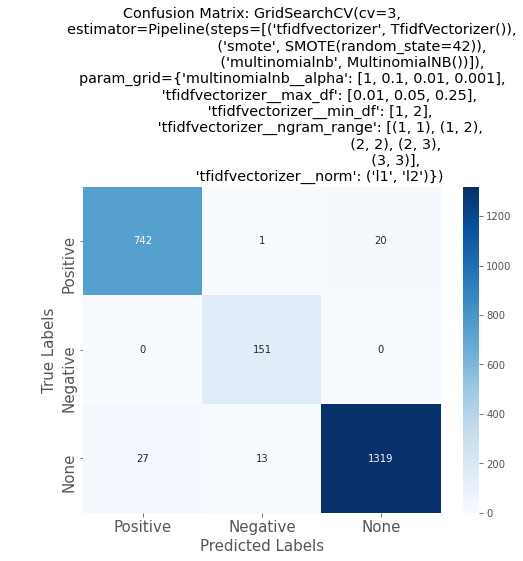

In [183]:
plot_cm_senti(gs_nb_tf, y_val, y_pred_nb_tf)

In [61]:
def classify(target_test, target_pred):    
    # Generate the classification report
    report = classification_report(target_test, target_pred)

    # Print the classification report
    print("Classification Report:")
    print(report)

In [62]:
classify(y_val, y_pred_nb_tf_train)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       763
           1       0.92      1.00      0.96       151
           2       0.99      0.97      0.98      1359

    accuracy                           0.97      2273
   macro avg       0.96      0.98      0.97      2273
weighted avg       0.97      0.97      0.97      2273



In [63]:
classify(y_val, y_pred_nb_tf)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       763
           1       0.92      1.00      0.96       151
           2       0.99      0.97      0.98      1359

    accuracy                           0.97      2273
   macro avg       0.96      0.98      0.97      2273
weighted avg       0.97      0.97      0.97      2273



## Iteration 3: Count Vectorizer, SMOTE, MB
The use case and purpose of modeling with Multinomial Naive Bayes and a Count Vectorizer are primarily for text classification tasks, especially when dealing with text data represented as bag-of-words or word frequency counts. Let's explore the purpose and benefits of each component:

- Count Vectorizer:
The Count Vectorizer is a feature extraction technique used to convert text data into numerical vectors. It creates a sparse matrix representation, where each row corresponds to a document (e.g., a sentence or a text entry), and each column represents a unique word from the entire corpus. The matrix's elements are the counts of each word in the corresponding document.

- Use Case:
The Count Vectorizer is especially useful when we want to represent text data in a format suitable for machine learning algorithms that require numerical inputs. It efficiently captures the frequency information of words in each document, allowing the model to learn from word occurrences.

- Multinomial Naive Bayes:
Multinomial Naive Bayes is a variant of the Naive Bayes algorithm specifically designed for multinomially distributed data, such as word counts. It is widely used for text classification tasks due to its simplicity and effectiveness, especially when dealing with high-dimensional and sparse feature spaces.

- Use Case:
Multinomial Naive Bayes is particularly suitable for text classification tasks, where the input features are typically represented as word frequency counts or term frequencies. Its primary use cases include:

- Sentiment Analysis: Classify text as positive or negative sentiment based on word occurrences.
Document Categorization: Group documents into predefined categories based on their word frequencies.
Spam Detection: Distinguish between spam and non-spam emails using word frequency patterns.
Topic Classification: Assign topics or themes to documents based on their word distributions.
Purpose of Modeling with Multinomial Naive Bayes and Count Vectorizer:

- Effortless Handling of Text Data:
The Count Vectorizer simplifies the process of converting text data into numerical format, preserving word frequency information. This numeric representation is essential for training machine learning models.

- Dealing with High-Dimensional Sparse Data:
Text data often results in high-dimensional, sparse feature spaces, where most entries in the feature vectors are zeros. Multinomial Naive Bayes can handle such sparse data effectively.

- Probabilistic Outputs:
Multinomial Naive Bayes provides probabilistic outputs, allowing us to interpret the model's confidence in its predictions. These probabilities can be useful in applications where decision thresholds can be adjusted based on the problem's requirements.

- Reasonable Performance and Scalability:
Multinomial Naive Bayes is computationally efficient and often achieves competitive performance in text classification tasks, making it suitable for large datasets.

- Interpretable Results:
Both Multinomial Naive Bayes and Count Vectorizer offer interpretability. The word frequency counts in the Count Vectorizer help understand the importance of words, while the coefficients in the Multinomial Naive Bayes model indicate the word's influence on the classification.



In [3]:
pipeline_nb_cv = make_pipeline(CountVectorizer(), SMOTE(), MultinomialNB())
pipeline_nb_cv

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('smote', SMOTE()),
                ('multinomialnb', MultinomialNB())])

In [4]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
# Define the parameter grid
grid_nb_cv = {
    'countvectorizer__min_df': [1, 2],
    'countvectorizer__max_df': [0.1, 0.25],
    'countvectorizer__ngram_range': [(1,1), (1,2), (2,2), (2,3), (3,3)],
    'multinomialnb__alpha': [1, 0.1, 0.01]   
}

In [5]:
# Initialize the gridsearch object with three-fold cross-validation
gs_nb_cv = GridSearchCV(pipeline_nb_cv, grid_nb_cv, cv=3)

In [6]:
gs_nb_cv.fit(X_t, y_t)

NameError: name 'X_t' is not defined

In [85]:
gs_nb_cv.best_params_

{'countvectorizer__max_df': 0.1,
 'countvectorizer__min_df': 1,
 'countvectorizer__ngram_range': (1, 2),
 'multinomialnb__alpha': 1}

In [86]:
gs_nb_cv.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.1, ngram_range=(1, 2))),
                ('smote', SMOTE()), ('multinomialnb', MultinomialNB(alpha=1))])

In [87]:
y_pred_nb_cv = gs_nb_cv.predict(X_val)
accuracy_score(y_val, y_pred_nb_cv)

0.6317641882974043

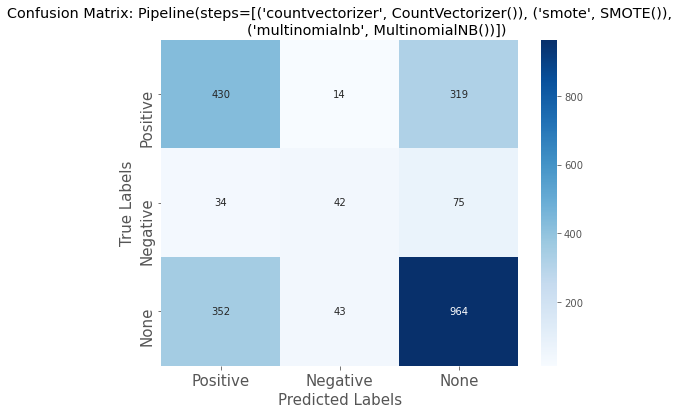

In [184]:
plot_cm_senti(pipeline_nb_cv, y_val, y_pred_nb_cv)

In [201]:

gs_nb_cv.best_score_

0.6534682504766095

In [202]:

gs_nb_cv.best_estimator_.score(X_val, y_val)

0.6322041355037396

## Iteration 4: XGBoost Pipeline
XGBoost (eXtreme Gradient Boosting) is a powerful and widely used machine learning algorithm designed for supervised learning tasks, including both classification and regression problems. It is an implementation of the gradient boosting framework that has gained popularity due to its exceptional performance and scalability.

The purpose of XGBoost is to create an accurate and robust predictive model by combining multiple weak predictive models, typically decision trees. Here are some key purposes and advantages of using XGBoost:

1. `High Prediction Accuracy:` XGBoost is known for its exceptional accuracy and predictive power. It leverages gradient boosting techniques to iteratively train a series of weak learners (decision trees) that sequentially correct the mistakes made by the previous models. This iterative process allows XGBoost to capture complex relationships within the data, resulting in improved predictive performance.

2. `Handling Complex Data Patterns:` XGBoost can effectively handle complex data patterns, including non-linear relationships and interactions between features. The algorithm can automatically capture and model these intricate relationships through the ensemble of decision trees, making it a suitable choice for a wide range of machine learning problems.

3. `Regularization and Control over Model Complexity:` XGBoost provides various regularization techniques to control the complexity of the model and prevent overfitting. Regularization methods, such as L1 and L2 regularization, can be applied to the model's weights or the structure of the decision trees. This helps prevent the model from becoming too complex and provides a way to balance between overfitting and underfitting.

4. `Feature Importance Analysis:` XGBoost offers built-in methods to assess the importance of features in the predictive model. By examining the contribution of each feature in the ensemble of decision trees, you can gain insights into the most influential features for making predictions. This analysis aids in feature selection, understanding the underlying data, and interpreting the model's behavior.

5. `Scalability and Efficiency:` XGBoost is designed to be highly scalable and efficient, enabling it to handle large datasets and perform computations in parallel. The algorithm includes optimizations such as parallel tree construction, approximate algorithms for split finding, and efficient memory usage. These features make XGBoost suitable for both small and large-scale machine learning tasks.

6. `Flexibility and Customization:` XGBoost offers a wide range of hyperparameters that can be tuned to optimize the model's performance for specific tasks. You can adjust parameters related to the tree structure, learning rate, regularization, and more. This flexibility allows you to customize the algorithm to suit your specific needs and achieve the best results.

In [178]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_pipe = make_pipeline(CountVectorizer(), SMOTE(), XGBClassifier(random_state=42,max_depth = 15, tree_method='hist', n_estimators = 50,n_jobs = -1))



# Train the model
xgb_pipe.fit(X_t, y_t)

# Make predictions on the validation set
target_pred = xgb_pipe.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, target_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 66.83%


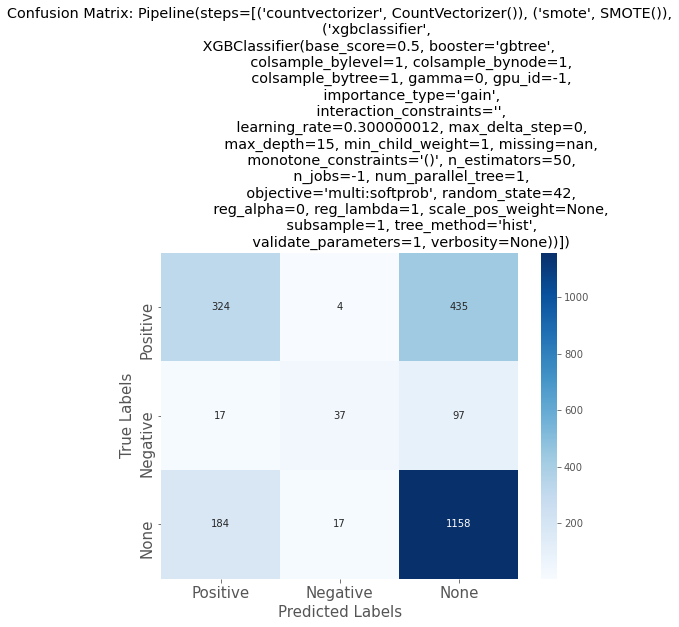

In [185]:
plot_cm_senti(xgb_pipe, y_val, target_pred)

Accuracy: 67.00%


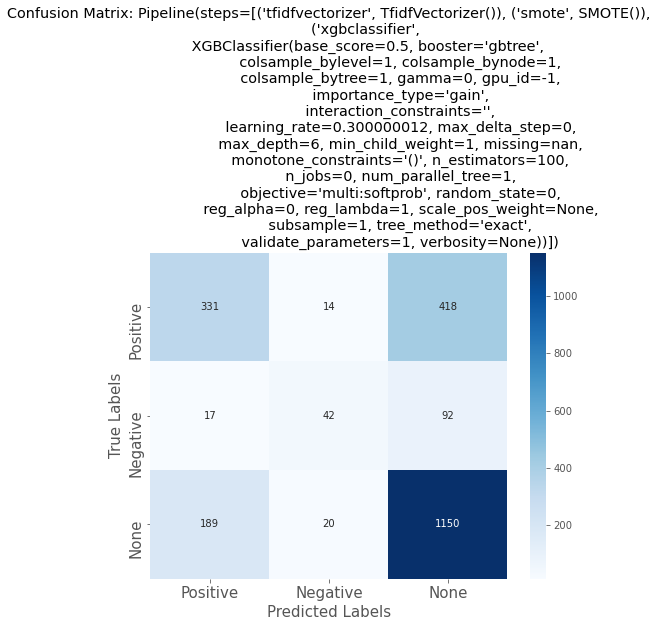

In [187]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_pipe = make_pipeline(TfidfVectorizer(), SMOTE(), XGBClassifier())



# Train the model
xgb_pipe.fit(X_t, y_t)

# Make predictions on the validation set
target_pred = xgb_pipe.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, target_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plot_cm_senti(xgb_pipe, y_val, target_pred)

In [188]:
forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)

Accuracy: 55.87%


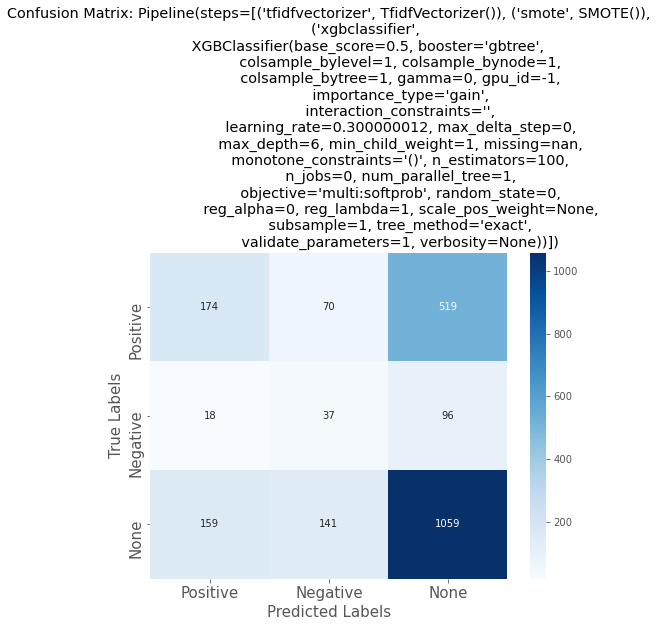

In [190]:
forest_pipe = make_pipeline(TfidfVectorizer(), SMOTE(), forest)



# Train the model
forest_pipe.fit(X_t, y_t)

# Make predictions on the validation set
target_pred =forest_pipe.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, target_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plot_cm_senti(xgb_pipe, y_val, target_pred)